In [42]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import os


pd.options.display.float_format = '{:.3f}'.format

In [63]:
df = pd.read_csv('/Users/seol-yoohwan/Documents/HS-restaurant-SYH/Marketing Mix Model/2022-09-03_16_20_adjust_automate_export.csv')
df

,주,네트워크,파트너,광고 비용,설치 수,page_view_regist_intro
0,2022-08-22 - 2022-08-28,Google Ads (Ad Spend),adwords,3762268.774,0,0
1,2022-08-29 - 2022-09-04,Google Ads (Ad Spend),adwords,1749121.140,0,0
2,2022-08-01 - 2022-08-07,Google Ads (Ad Spend),adwords,1736674.697,0,0
3,2022-08-08 - 2022-08-14,Google Ads (Ad Spend),adwords,1633879.810,0,0
4,2022-08-01 - 2022-08-07,Apple Search Ads,apple,1577512.832,89,65
...,...,...,...,...,...,...
193,2022-08-08 - 2022-08-14,trackerTestbs,adbox,0.000,9,7
194,2022-08-22 - 2022-08-28,trackerTestbs,adbox,0.000,1,0
195,2022-08-29 - 2022-09-04,trackerTestbs,adbox,0.000,357,343
196,2022-07-18 - 2022-07-24,trackerTestbs,adbox,0.000,1,0


In [64]:
cond = df['광고 비용'] > 0
df = df[cond]
df.head()

,주,네트워크,파트너,광고 비용,설치 수,page_view_regist_intro
0,2022-08-22 - 2022-08-28,Google Ads (Ad Spend),adwords,3762268.774,0,0
1,2022-08-29 - 2022-09-04,Google Ads (Ad Spend),adwords,1749121.140,0,0
2,2022-08-01 - 2022-08-07,Google Ads (Ad Spend),adwords,1736674.697,0,0
3,2022-08-08 - 2022-08-14,Google Ads (Ad Spend),adwords,1633879.810,0,0
4,2022-08-01 - 2022-08-07,Apple Search Ads,apple,1577512.832,89,65


In [65]:
df['channel'] = df['네트워크'] + " " + df['파트너']
df = df[['주','channel','광고 비용','설치 수']]
df.head()

/var/folders/pz/tn8lxfdj51x4drx0xtyl0lt00000gn/T/ipykernel_1406/3755828092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['channel'] = df['네트워크'] + " " + df['파트너']


,주,channel,광고 비용,설치 수
0,2022-08-22 - 2022-08-28,Google Ads (Ad Spend) adwords,3762268.774,0
1,2022-08-29 - 2022-09-04,Google Ads (Ad Spend) adwords,1749121.140,0
2,2022-08-01 - 2022-08-07,Google Ads (Ad Spend) adwords,1736674.697,0
3,2022-08-08 - 2022-08-14,Google Ads (Ad Spend) adwords,1633879.810,0
4,2022-08-01 - 2022-08-07,Apple Search Ads apple,1577512.832,89


In [71]:

df_gr = df.groupby(['주','channel'], as_index=False)['광고 비용','설치 수'].sum()
df_gr = df_gr[df_gr['설치 수']>0]
df_gr

/var/folders/pz/tn8lxfdj51x4drx0xtyl0lt00000gn/T/ipykernel_1406/3059431212.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gr = df.groupby(['주','channel'], as_index=False)['광고 비용','설치 수'].sum()


,주,channel,광고 비용,설치 수
1,2022-05-30 - 2022-06-05,Apple Search Ads apple,75753.405,41
3,2022-06-06 - 2022-06-12,Apple Search Ads apple,2138.291,3
5,2022-06-13 - 2022-06-19,Apple Search Ads apple,671419.014,68
7,2022-06-20 - 2022-06-26,Apple Search Ads apple,469269.578,58
13,2022-08-01 - 2022-08-07,Apple Search Ads apple,1577512.832,89
15,2022-08-08 - 2022-08-14,Apple Search Ads apple,1036923.089,128
17,2022-08-15 - 2022-08-21,Apple Search Ads apple,1034932.912,184
19,2022-08-22 - 2022-08-28,Apple Search Ads apple,790514.892,122
21,2022-08-29 - 2022-09-04,Apple Search Ads apple,591457.578,118


In [70]:
df_pivot = df.pivot(index= '주', columns= ('channel' ) , values= '광고 비용' )
df_pivot.reset_index(level=0 ,inplace= True)
df_pivot.head()

channel,주,Apple Search Ads apple,Google Ads (Ad Spend) adwords
0,2022-05-23 - 2022-05-29,NaN,2314.635
1,2022-05-30 - 2022-06-05,75753.405,441909.829
2,2022-06-06 - 2022-06-12,2138.291,968590.130
3,2022-06-13 - 2022-06-19,671419.014,429512.520
4,2022-06-20 - 2022-06-26,469269.578,495293.378


In [107]:
df_merged = pd.merge(df_pivot, df_gr, on = '주'  ,how = 'left' )
df_merged = df_merged.drop(columns='광고 비용')
df_merged = df_merged.drop(columns='channel')
df_merged = df_merged.fillna(0)
df_merged

,주,Apple Search Ads apple,Google Ads (Ad Spend) adwords,설치 수
0,2022-05-23 - 2022-05-29,0.000,2314.635,0.000
1,2022-05-30 - 2022-06-05,75753.405,441909.829,41.000
2,2022-06-06 - 2022-06-12,2138.291,968590.130,3.000
3,2022-06-13 - 2022-06-19,671419.014,429512.520,68.000
4,2022-06-20 - 2022-06-26,469269.578,495293.378,58.000
5,2022-06-27 - 2022-07-03,0.000,447786.103,0.000
6,2022-07-11 - 2022-07-17,0.000,387348.016,0.000
7,2022-07-18 - 2022-07-24,0.000,1315564.353,0.000
8,2022-07-25 - 2022-07-31,0.000,988474.082,0.000
9,2022-08-01 - 2022-08-07,1577512.832,1736674.697,89.000


In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   주                              14 non-null     object 
 1   Apple Search Ads apple         14 non-null     float64
 2   Google Ads (Ad Spend) adwords  14 non-null     float64
 3   설치 수                           14 non-null     float64
dtypes: float64(3), object(1)
memory usage: 560.0+ bytes


<AxesSubplot:>

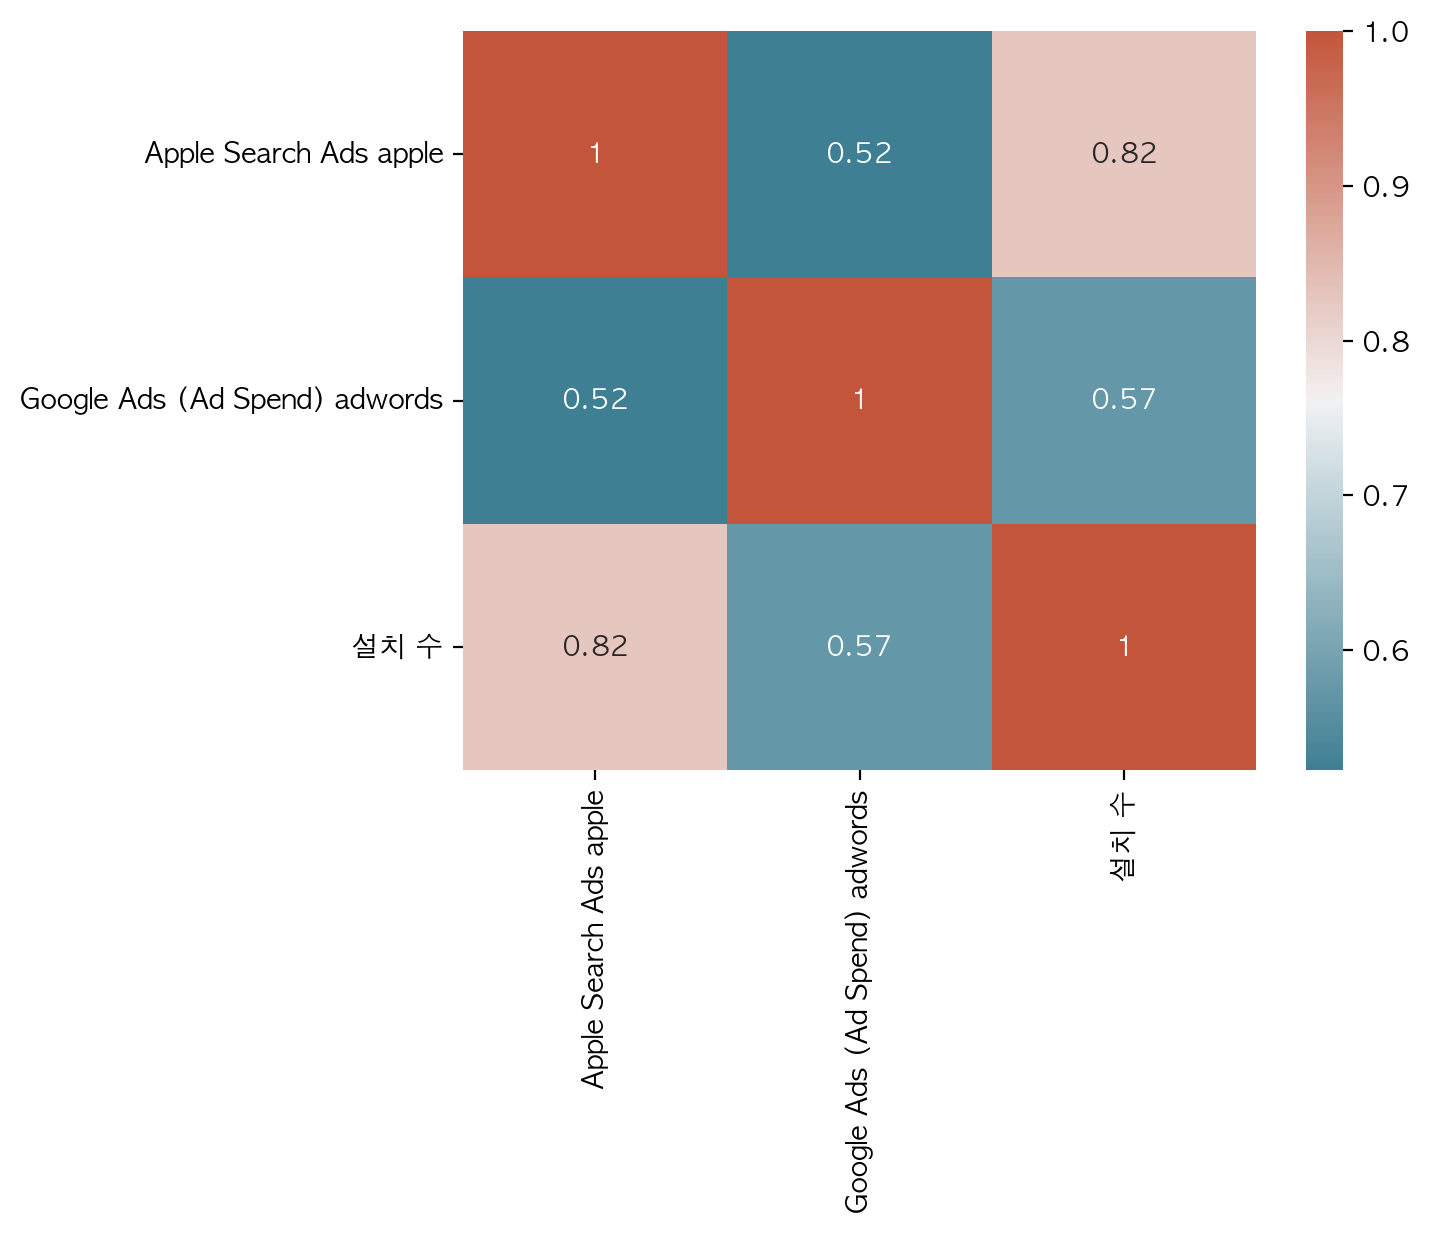

In [86]:
corr = df_merged.corr() #correlation 계산 (-> 데이터프레임으로 반환)

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

sns.heatmap(corr, #데이터는 위에서 계산한 correlation dataframe
            xticklabels=corr.columns, #x축 라벨 : correlation dataframe의 columns
            yticklabels=corr.columns, #y축 라벨 : correlation dataframe의 columns
            annot=True, #값 표시 여부 설정 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))#두 개 색상사이의 palette 만들기 
# strong correlation between Tv and sales (0.78)

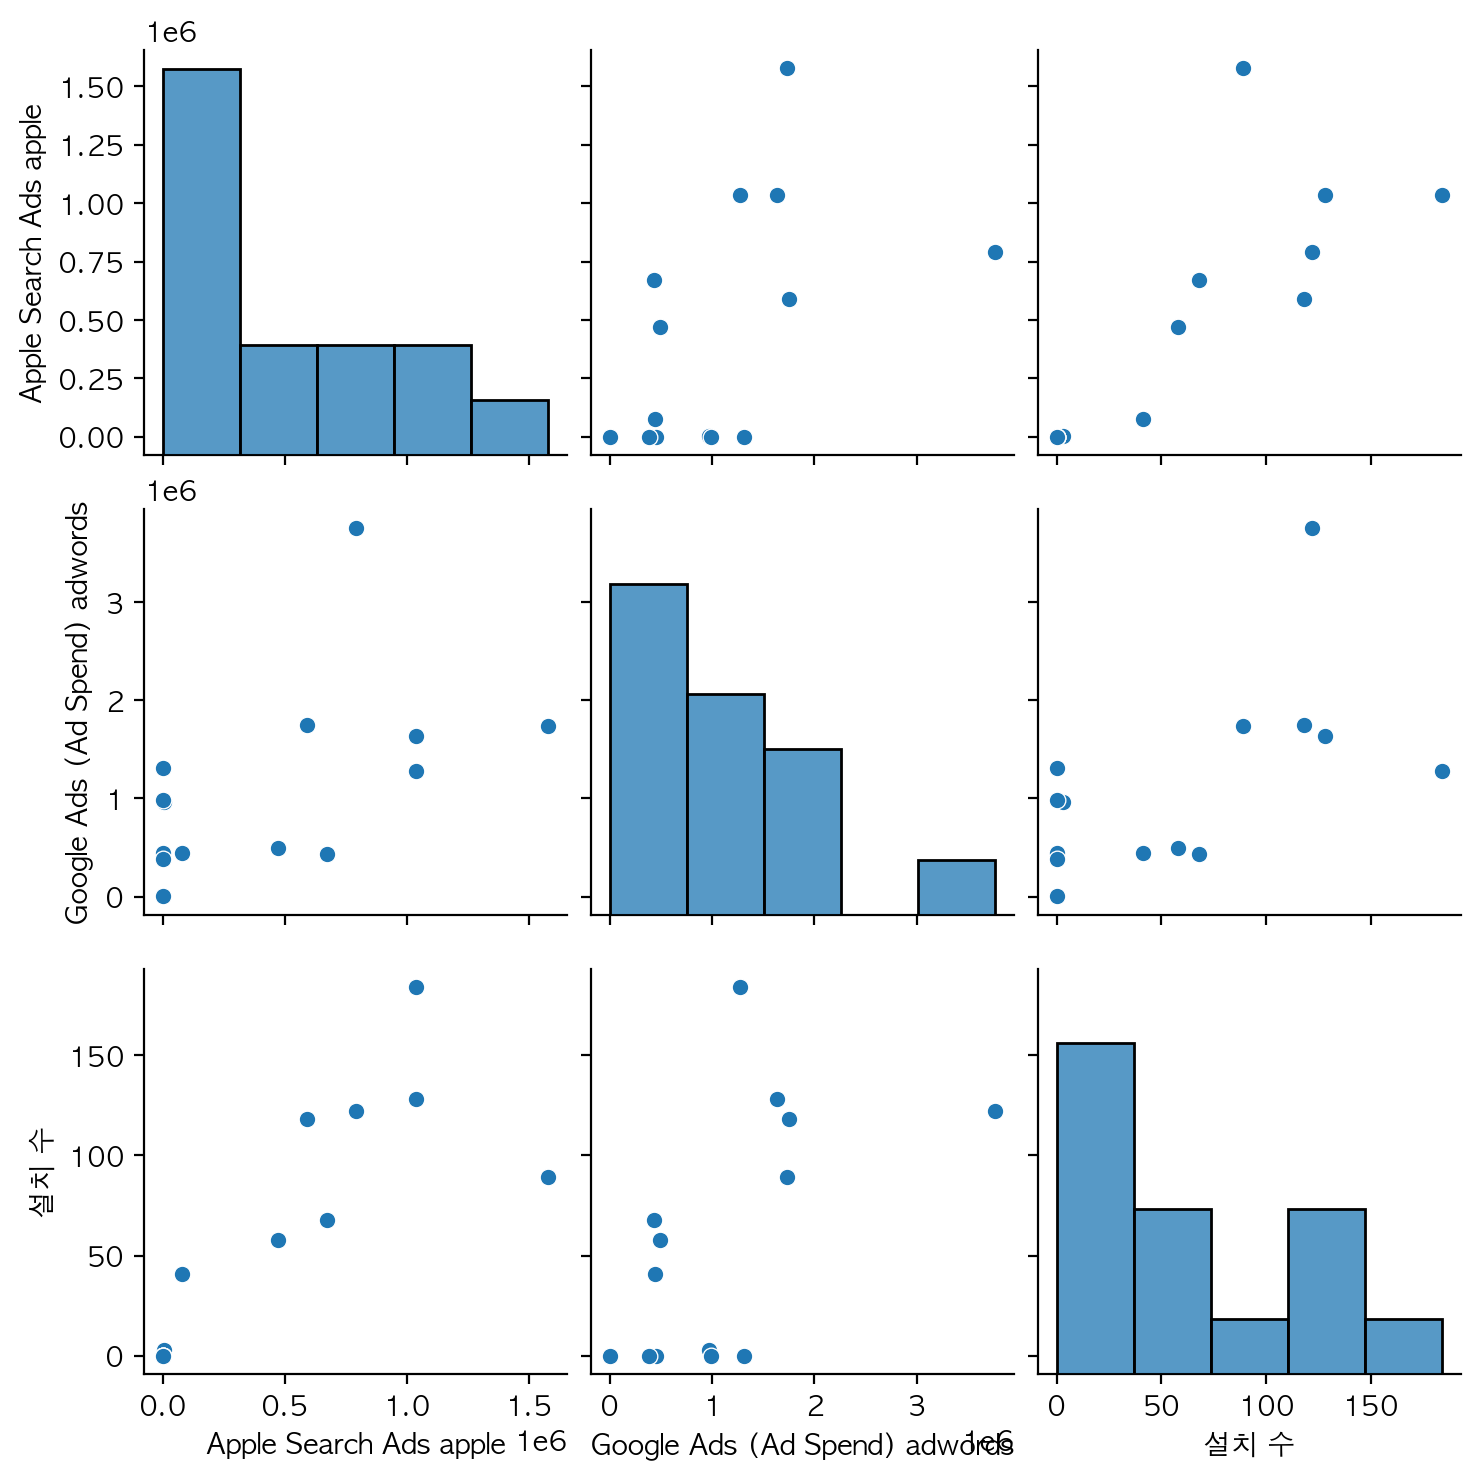

In [87]:
sns.pairplot(df_merged)

In [88]:
one = df_merged.columns[1]
two = df_merged.columns[2]

Index(['주', 'Apple Search Ads apple', 'Google Ads (Ad Spend) adwords', '설치 수'], dtype='object')

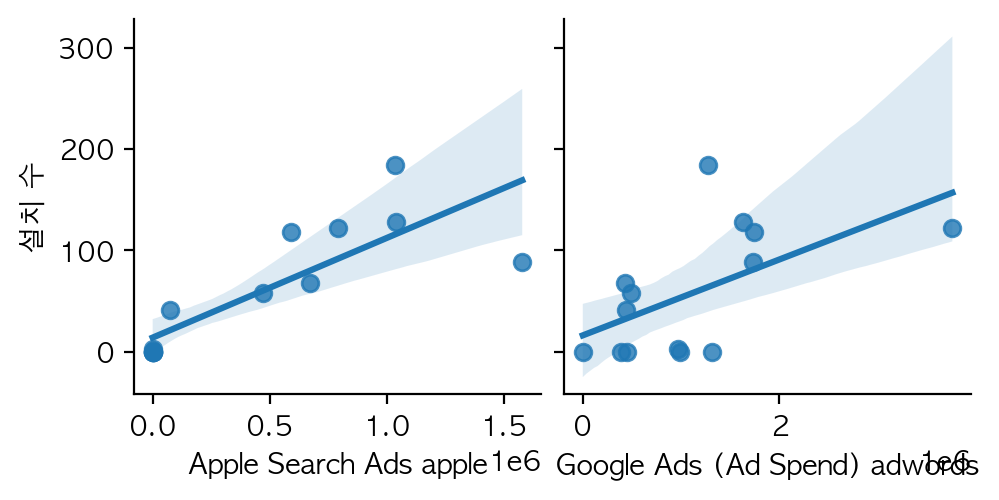

In [95]:
sns.pairplot(df_merged, x_vars = ['Apple Search Ads apple','Google Ads (Ad Spend) adwords'], y_vars='설치 수' ,kind='reg')

In [108]:
df_merged = df_merged.rename(columns = {'Apple Search Ads apple':'apple'
                ,'Google Ads (Ad Spend) adwords':'google'
                , '설치 수': 'install'} )
df_merged

,주,apple,google,install
0,2022-05-23 - 2022-05-29,0.000,2314.635,0.000
1,2022-05-30 - 2022-06-05,75753.405,441909.829,41.000
2,2022-06-06 - 2022-06-12,2138.291,968590.130,3.000
3,2022-06-13 - 2022-06-19,671419.014,429512.520,68.000
4,2022-06-20 - 2022-06-26,469269.578,495293.378,58.000
5,2022-06-27 - 2022-07-03,0.000,447786.103,0.000
6,2022-07-11 - 2022-07-17,0.000,387348.016,0.000
7,2022-07-18 - 2022-07-24,0.000,1315564.353,0.000
8,2022-07-25 - 2022-07-31,0.000,988474.082,0.000
9,2022-08-01 - 2022-08-07,1577512.832,1736674.697,89.000


In [112]:
import statsmodels.formula.api as sm


model = sm.ols(formula="install~apple+google", data=df_merged).fit()
#df는 독립변수, 종속변수가 모두 포함된 데이터프레임
#formular는 종속변수와 독립변수를 지정
#fit 메서드로 모형을 추정 -> RegressionResults라는 클래스 객체로 추정 결과 출력 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                install   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sun, 04 Sep 2022   Prob (F-statistic):            0.00114
Time:                        02:34:43   Log-Likelihood:                -68.455
No. Observations:                  14   AIC:                             142.9
Df Residuals:                      11   BIC:                             144.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1974     15.585      0.333      0.7

/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
